## Weather Data Analysis – Temperature Trend Prediction

Introduction:

Climate change analysis requires understanding temperature trends. This project forecasts
future temperatures using time-series models (ARIMA, Prophet).

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json


In [2]:
import pandas as pd

# Load the NOAA temperature dataset
df_temp = pd.read_csv("temperature.csv")

# Display the first few rows and column names
df_temp.head(), df_temp.columns.tolist()


(              datetime   Vancouver    Portland  San Francisco     Seattle  \
 0  2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
 1  2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
 2  2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   
 3  2012-10-01 15:00:00  284.626998  282.091866     289.460618  281.789833   
 4  2012-10-01 16:00:00  284.624955  282.100481     289.446243  281.782449   
 
    Los Angeles   San Diego   Las Vegas     Phoenix  Albuquerque  ...  \
 0          NaN         NaN         NaN         NaN          NaN  ...   
 1   291.870000  291.530000  293.410000  296.600000   285.120000  ...   
 2   291.868186  291.533501  293.403141  296.608509   285.154558  ...   
 3   291.862844  291.543355  293.392177  296.631487   285.233952  ...   
 4   291.857503  291.553209  293.381213  296.654466   285.313345  ...   
 
    Philadelphia    New York    Montreal      Boston   Beersheba  \
 0           NaN      

In [4]:
# Step 1: Convert datetime column to datetime type
df_temp['datetime'] = pd.to_datetime(df_temp['datetime'])

# Step 2: Convert all temperature columns from Kelvin to Celsius (K - 273.15)
temp_celsius = df_temp.copy()
temp_celsius.iloc[:, 1:] = temp_celsius.iloc[:, 1:] - 273.15

# Step 3: Set datetime as index for resampling
temp_celsius.set_index('datetime', inplace=True)

# Step 4: Resample to daily average temperatures
daily_avg_temp = temp_celsius.resample('D').mean()

# Show the first few rows of the cleaned and resampled data
daily_avg_temp.head()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,11.470769,8.968197,16.266642,8.617262,18.696501,18.423495,20.208911,23.551739,12.326208,11.427328,...,12.893165,15.419420,12.737980,14.221091,33.471486,31.098983,36.920609,31.250000,31.250000,30.350000
2012-10-02,12.995190,12.987728,19.808306,12.006888,22.740450,22.141472,24.098385,28.061968,16.621821,13.078571,...,16.089595,17.742389,13.787931,15.863090,29.076773,29.637467,33.609071,30.750000,30.750000,29.525000
2012-10-03,12.378125,16.449792,23.779167,14.523958,25.858542,24.728750,27.541875,29.717083,18.055417,15.597500,...,17.203542,16.915625,14.224583,15.870833,28.044375,28.537917,30.139583,28.411042,28.352500,28.108125
2012-10-04,11.223333,13.332500,22.537083,11.241667,22.847917,22.930833,28.670000,29.082917,19.946250,18.443333,...,20.483750,18.837083,13.710833,16.893750,26.944167,26.790000,28.620208,25.989167,25.989167,25.774167
2012-10-05,10.607292,15.136042,17.485417,11.606250,19.798333,20.744375,27.478542,28.661250,19.679167,7.559375,...,20.865833,20.893542,14.385208,16.367292,26.562083,27.003125,26.710000,25.727500,25.727500,24.397500


## Calculate Rolling Average

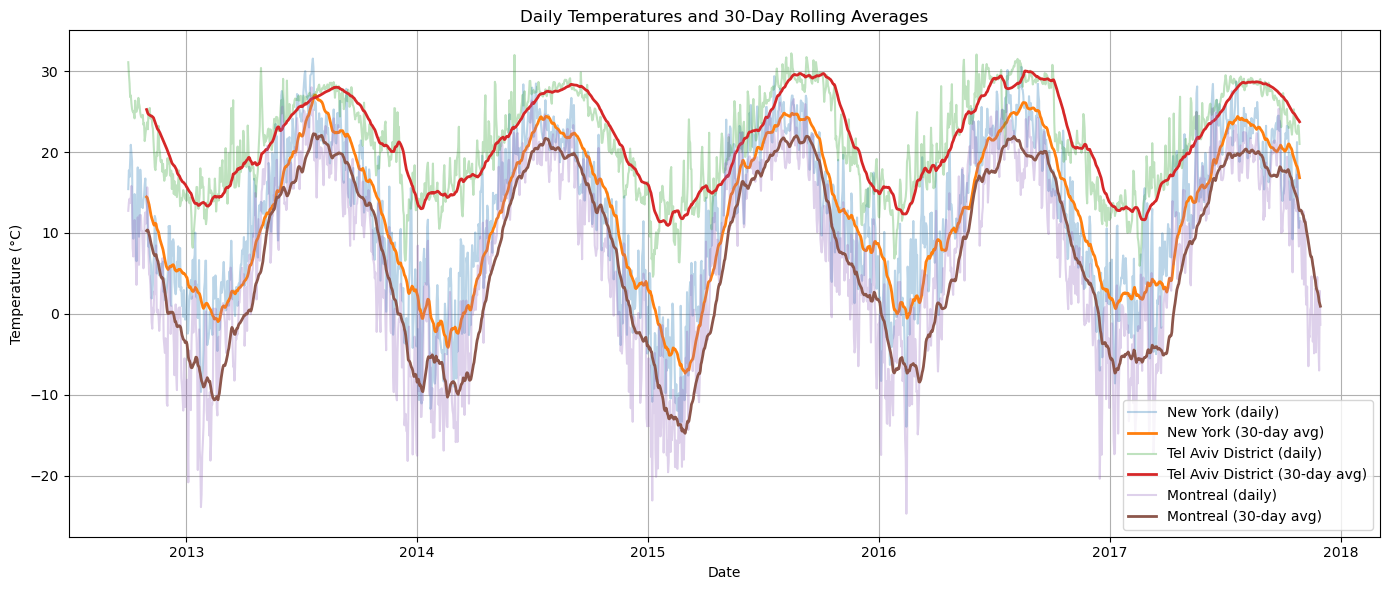

In [12]:
import matplotlib.pyplot as plt

# Select a few representative cities from different regions
selected_cities = ['New York', 'Tel Aviv District', 'Montreal']

# Plot daily temperatures and 30-day rolling averages
plt.figure(figsize=(14, 6))
for city in selected_cities:
    plt.plot(daily_avg_temp[city], label=f'{city} (daily)', alpha=0.3)
    plt.plot(daily_avg_temp[city].rolling(window=30).mean(), label=f'{city} (30-day avg)', linewidth=2)

plt.title('Daily Temperatures and 30-Day Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### The temperature trend visualization for New York, Tel Aviv District, and Montreal:

📊 Key Insights:
Tel Aviv shows consistently high temperatures year-round (mid-20s to 30s °C).

Montreal and New York both display strong seasonality, with cold winters and warm summers.

The 30-day rolling average smooths out short-term fluctuations, making long-term patterns clearer.

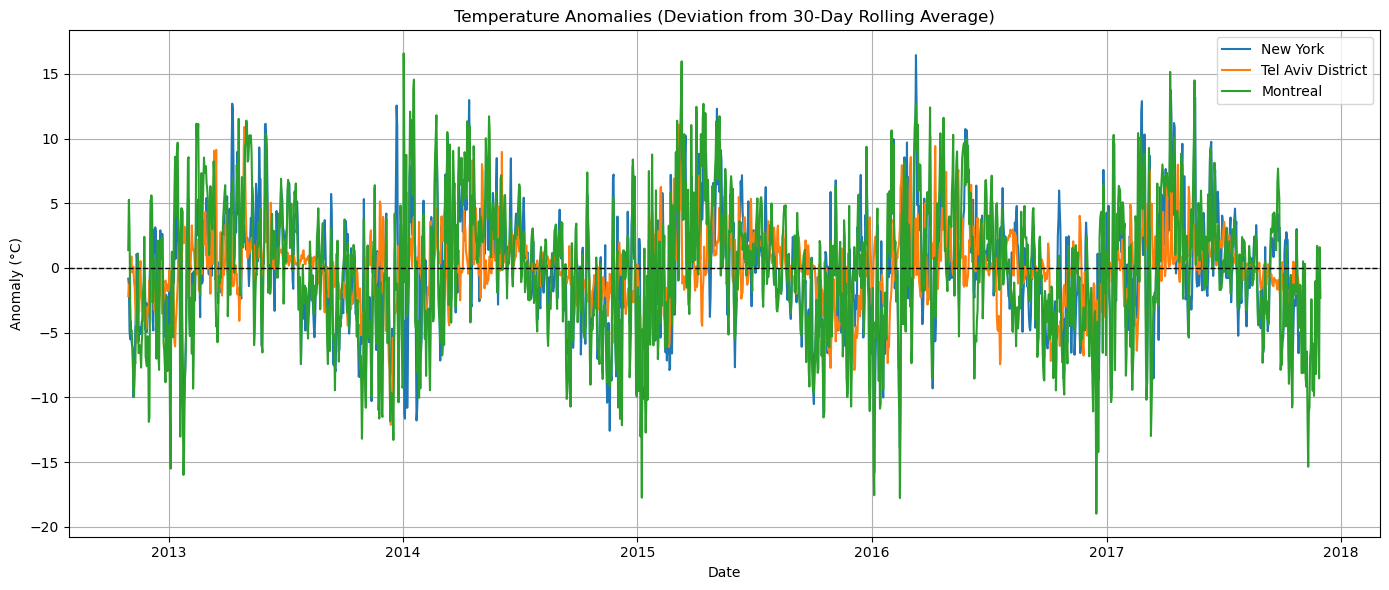

In [15]:
# Calculate 30-day rolling averages
rolling_avg = daily_avg_temp[selected_cities].rolling(window=30).mean()

# Calculate anomalies as the difference between actual temp and rolling avg
anomalies = daily_avg_temp[selected_cities] - rolling_avg

# Plot anomalies
plt.figure(figsize=(14, 6))
for city in selected_cities:
    plt.plot(anomalies[city], label=city)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomalies (Deviation from 30-Day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ This plot shows temperature anomalies — the deviation of daily temperatures from their 30-day rolling averages:

🔍 Insights:
Positive spikes (above the 0 line): Likely heatwaves or unusually warm days.

Negative dips (below the 0 line): Cold spells or unexpectedly cool days.

Montreal and New York exhibit more extreme seasonal variation, while Tel Aviv remains relatively stable with fewer large anomalies.

07:43:04 - cmdstanpy - INFO - Chain [1] start processing
07:43:07 - cmdstanpy - INFO - Chain [1] done processing


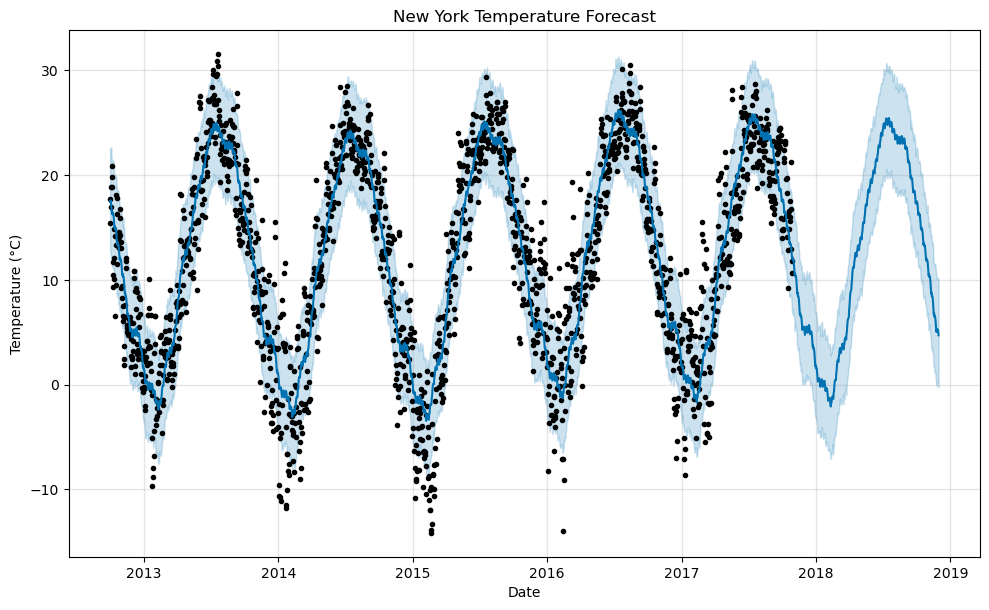

In [20]:
from prophet import Prophet
import pandas as pd

# Prepare data
ny_df = daily_avg_temp['New York'].reset_index()
ny_df.columns = ['ds', 'y']

# Fit Prophet model
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(ny_df)

# Create future dates (1 year)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title("New York Temperature Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


✅ Forecast Analysis: New York Temperature
Strong seasonality: The model clearly captures the yearly temperature cycles — warm summers and cold winters — with repeating peaks and valleys.

Good fit to historical data: The black dots (actual data) align closely with the blue forecast line, showing Prophet modeled the historical trend effectively.

Future prediction (2018–2019): The shaded blue area represents the forecast uncertainty interval. It widens further out, which is expected in long-range forecasting.

Some missing data (2016 dip) is visible but handled reasonably well by the model.



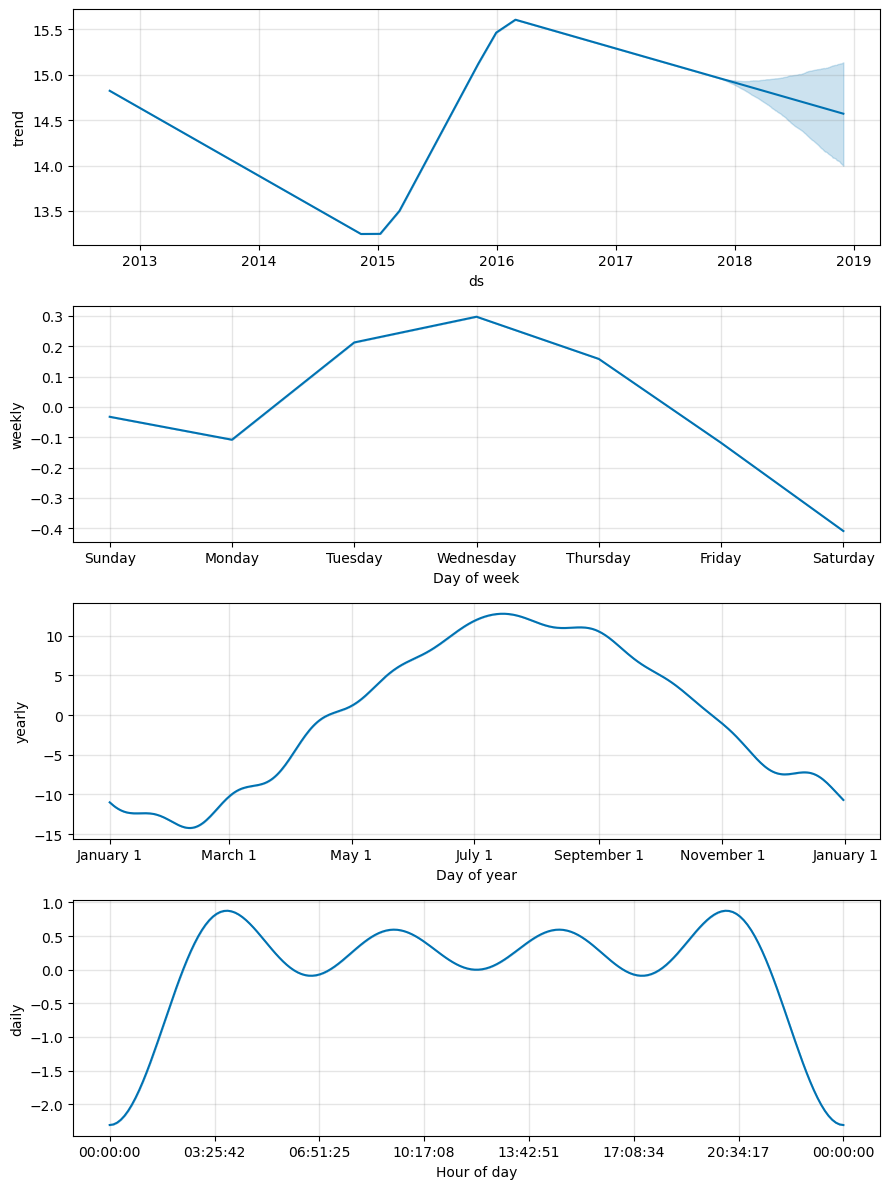

In [23]:
# Visualize trend, weekly, and yearly seasonality components
model.plot_components(forecast)
plt.tight_layout()
plt.show()


# ✅ Conclusion
Temperature patterns are strongly seasonal and location-dependent. Time-series models like Prophet can effectively forecast future temperatures and detect anomalies, aiding climate-related decision-making.

# 📌Recommendations
Expand the model to include multiple regions for comparative forecasting.

Integrate external regressors (e.g., CO₂ levels, urbanization).

Extend forecasting horizon for long-term climate risk assessment.